# Watershed Segmentation
There is a PlantCV function is based on code contributed by Suxing Liu, Arkansas State University. For more information see https://github.com/lsx1980/Leaf_count. This function uses the watershed algorithm to detect boundary of objects. Needs a mask file which specifies area which is object is white, and background is black. Requires cv2 version 3.0+

In [2]:
from plantcv import plantcv as pcv

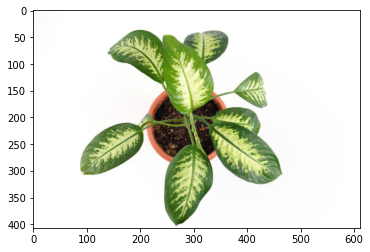

In [3]:
# Use arabidopsis.jpg or Diffebanchia.jpg
class options:
    def __init__(self):
        self.image = "./Diffebanchia.jpg"
        self.debug = "plot"
        self.writeimg= False 
        self.outdir = "." #significa que estamos en el directorio base
# Get options
args = options()

# Set debug to the global parameter 
pcv.params.debug = args.debug

# Read image

# Inputs:
#   filename - Image file to be read in 
#   mode - Return mode of image; either 'native' (default), 'rgb', 'gray', or 'csv' 

img, path, filename = pcv.readimage(filename=args.image)

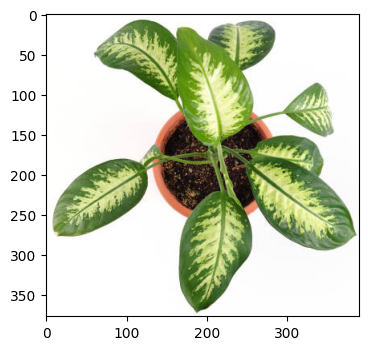

(407, 612, 3)

In [14]:
# Crop the image down to focus on just one plant 
crop_img = img[30:,80:470] # para cortar la imagen  
# Print it out to see 
pcv.plot_image(crop_img)
img.shape

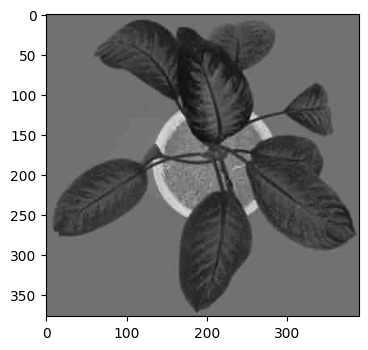

In [20]:
# Convert image from RGB color space to LAB and keep only the 
# green-magenta channel 

# Inputs:
#    rgb_img = image object, RGB color space
#    channel = color subchannel ('l' = lightness, 'a' = green-magenta , 'b' = blue-yellow)

a = pcv.rgb2gray_lab(rgb_img=crop_img, channel='a')
#xx = pcv.rgb2gray_hsv(rgb_img=crop_img, channel='v')


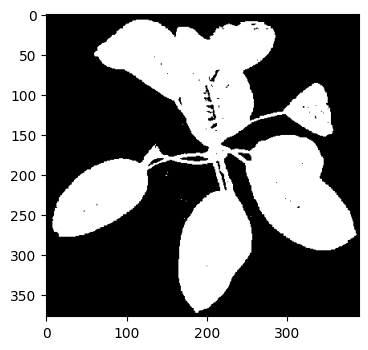

In [27]:
# Set a binary threshold on the image 

# Inputs:
#    gray_img    = img object, grayscale
#    threshold   = threshold value (0-255)
#    max_value   = value to apply above threshold (usually 255 = white)
#    object_type = light or dark
#       - If object is light then standard thresholding is done
#       - If object is dark then inverse thresholding is done

img_binary = pcv.threshold.binary(gray_img=a, threshold=120, max_value=150, object_type='dark')

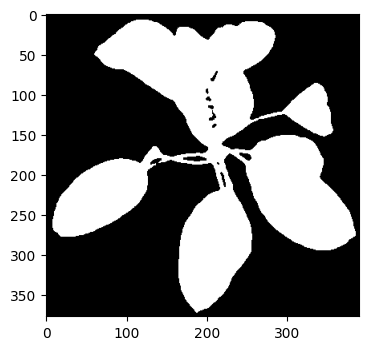

In [28]:
img_median= pcv.median_blur(gray_img=img_binary, ksize=5)
#filtro de mediana para elimianr los elementos de baja frecuencia

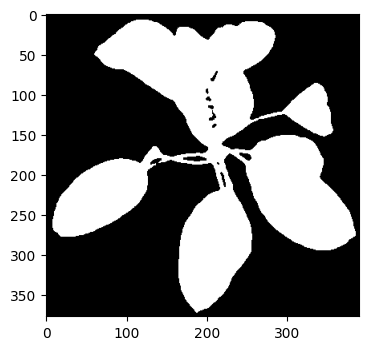

In [29]:
fill_image=pcv.fill(bin_img=img_median, size=100)
# sirve para eliminar los puntos pequelos

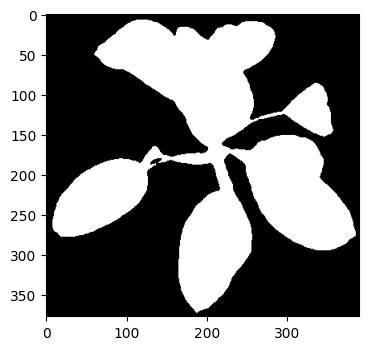

In [30]:
fill_holes_image=pcv.fill_holes(fill_image)
# para rellenar los ahujeros dentro de la imagen

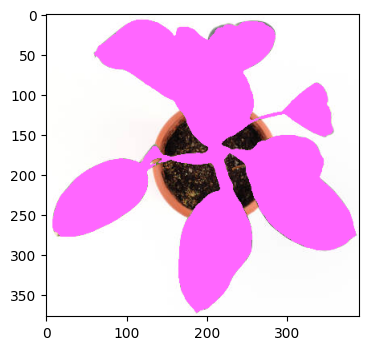

In [31]:
# Find objects --- encontrar objetos

# Inputs:
#    img  = image that the objects will be overlayed --- imagen en color
#    mask = what is used for object detection --- mascara creada

id_objects, obj_hierarchy = pcv.find_objects(img=crop_img, mask=fill_holes_image) # identificando objetos y con orden jerarquica

#id_objects, obj_hierarchy = pcv.find_objects(img=crop_img, mask=fill_image)

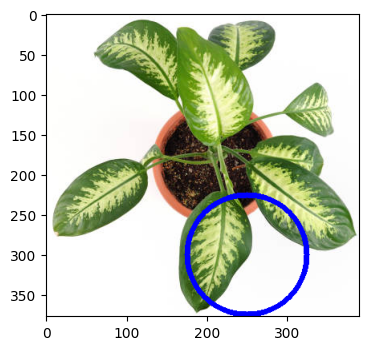

In [32]:
#Make a circular ROI --- selector de region de interes (circular, eliptico, rectancugar, personalizado)
# no se necesita como es un solo objeto
#roi_contour, roi_hierarchy = pcv.roi.circle(img=crop_img, x=250, y=300, r=75) #centro del circulo y radio que tiene el circulo

In [ ]:
# Decide which objects to keep
# espara ver que objeto es que que se queda

#no se necesita como es un solo objeto
# Inputs:
#    img            = img to display kept objects
#    roi_contour    = contour of roi, output from any ROI function
#    roi_hierarchy  = contour of roi, output from any ROI function
#    object_contour = contours of objects, output from pcv.find_objects function
#    obj_hierarchy  = hierarchy of objects, output from pcv.find_objects function
#    roi_type       = 'partial' (default, for partially inside the ROI), 'cutto', or 
#                     'largest' (keep only largest contour)
#roi_objects2, hierarchy3_b, kept_mask_2, obj_area_2 = pcv.roi_objects(img=crop_img, roi_contour=roi_contour, 
#                                                               roi_hierarchy=roi_hierarchy, 
#                                                               object_contour=id_objects, 
#                                                               obj_hierarchy=obj_hierarchy,
#                                                               roi_type='partial')



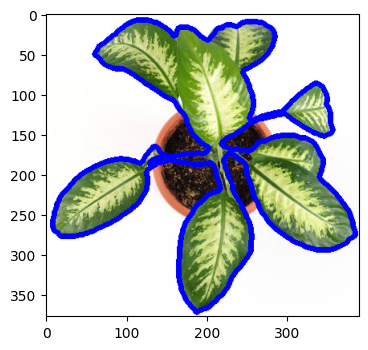

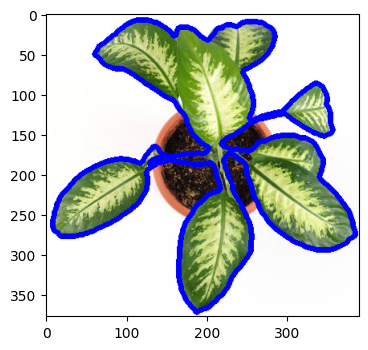

In [33]:
# Combine objects 

# Inputs:
#   img       = RGB or grayscale image data for plotting 
#   contours  = Contour list 
#   hierarchy = Contour hierarchy array 

#obj, mask = pcv.object_composition(img=crop_img, contours=roi_objects2, hierarchy=hierarchy3_b)
obj, mask = pcv.object_composition(img=crop_img, contours=id_objects, hierarchy=obj_hierarchy)

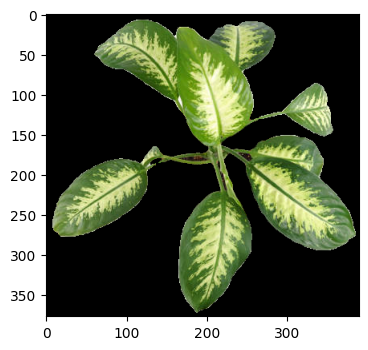

In [34]:
# Appy mask -- aplicar la mascara a la imagen

# Inputs:
#   img        = RGB or grayscale image data 
#   mask       = Binary mask image data 
#   mask_color = 'white' or 'black' 

masked = pcv.apply_mask(img=crop_img, mask=mask, mask_color="black")
#utilizar la imganen original, la mascara y el color del fondo

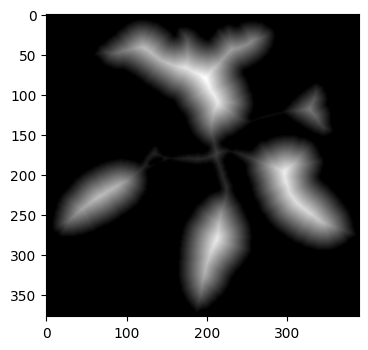

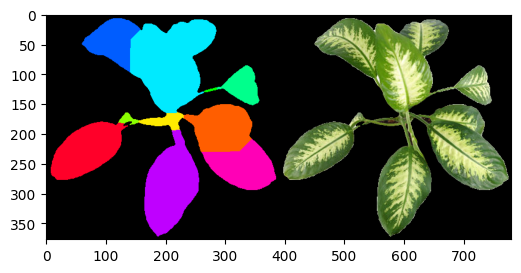

In [37]:
# Use watershed segmentation 

# Inputs:
#   rgb_img  = RGB image data 
#   mask     = Binary image, single channel, object in white and background black
#   distance = Minimum distance of local maximum, lower values are more sensitive, 
#              and segments more objects (default: 10)
#   label    = Optional label parameter, modifies the variable name of observations recorded. (default `label="default"`)filled_img = pcv.morphology.fill_segments(mask=cropped_mask, objects=edge_objects)


analysis_images = pcv.watershed_segmentation(rgb_img=masked, mask=mask, distance=15)
#entre menor sea el numero en distancia realiza mas segmentos

In [38]:
# The save results function will take the measurements stored when running any PlantCV analysis function_s, format, 
# and print an output text file for data analysis. The Outputs class stores data whenever any of the following functions
# are ran: analyze_bound_horizontal, analyze_bound_vertical, analyze_color, analyze_nir_intensity, analyze_object, 
# fluor_fvfm, report_size_marker_area, watershed. If no functions have been run, it will print an empty text file 


pcv.outputs.save_results(filename='numero_hojas_Diffebanchia.csv',outformat="csv")